In [1]:
from ase.io import read
atoms=read('/home/emi/lammps/aSi-1728/relaxed.data',format='lammps-data',style='atomic')
import numpy as np
natom=len(atoms.positions)
nmodes=natom*3
dyn_file='/home/emi/lammps/aSi-1728/Dyn.form'
lammps_dyn=np.loadtxt(dyn_file).reshape((nmodes,nmodes))
eigenvalue, eigenvector=np.linalg.eigh(lammps_dyn)

In [2]:
kmin=2.0*np.pi/atoms.cell[0,0]
kmin

0.19136245817894493

In [3]:
kmax=kmin*10
kvec=np.linspace(kmin,kmax,50)
n_kpt=len(kvec)
n_kpt

50

In [4]:
import numpy as np
C_L=np.load('C_L_1728.npy')
C_T=np.load('C_T_1728.npy')

In [5]:
mesh_energy=np.linspace(0,15,100)

In [8]:
import pyAF.constants
pc=pyAF.constants.physical_constants()
omega=[]
nmodes=len(eigenvalue)
#extract minimum index of negative frequency
mode_negative=0
for i in range(nmodes):
    if eigenvalue[i] <0.0:
        val=0
        omega.append(val)
        mode_negative=i
    else:
        val=np.sqrt(eigenvalue[i])*pc.scale_THz
        omega.append(val)

In [22]:
import pyAF.postprocess
dsf_L, dsf_T=pyAF.postprocess.dynamic_structure_factor(C_L=C_L, C_T=C_T, mesh_energy=mesh_energy, frequency=omega, smearing=0.003)

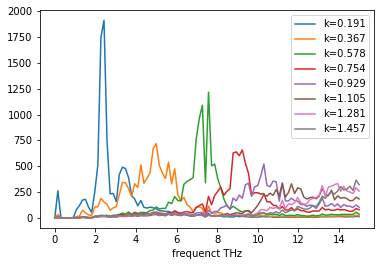

In [23]:
import matplotlib.pyplot as plt
plt.plot(mesh_energy,dsf_L[0,:],label='k={0:.3f}'.format(kvec[0]))
plt.plot(mesh_energy,dsf_L[5,:],label='k={0:.3f}'.format(kvec[5]))
plt.plot(mesh_energy,dsf_L[11,:],label='k={0:.3f}'.format(kvec[11]))
plt.plot(mesh_energy,dsf_L[16,:],label='k={0:.3f}'.format(kvec[16]))
plt.plot(mesh_energy,dsf_L[21,:],label='k={0:.3f}'.format(kvec[21]))
plt.plot(mesh_energy,dsf_L[26,:],label='k={0:.3f}'.format(kvec[26]))
plt.plot(mesh_energy,dsf_L[31,:],label='k={0:.3f}'.format(kvec[31]))
plt.plot(mesh_energy,dsf_L[36,:],label='k={0:.3f}'.format(kvec[36]))

plt.xlabel('frequenct THz')
plt.legend()
plt.savefig('S_L_1728atom.png')

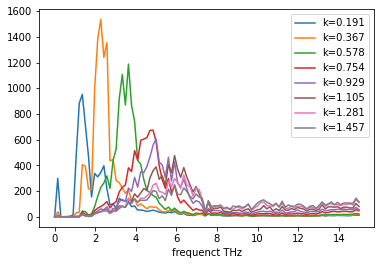

In [24]:
import matplotlib.pyplot as plt
plt.plot(mesh_energy,dsf_T[0,:],label='k={0:.3f}'.format(kvec[0]))
plt.plot(mesh_energy,dsf_T[5,:],label='k={0:.3f}'.format(kvec[5]))
plt.plot(mesh_energy,dsf_T[11,:],label='k={0:.3f}'.format(kvec[11]))
plt.plot(mesh_energy,dsf_T[16,:],label='k={0:.3f}'.format(kvec[16]))
plt.plot(mesh_energy,dsf_T[21,:],label='k={0:.3f}'.format(kvec[21]))
plt.plot(mesh_energy,dsf_T[26,:],label='k={0:.3f}'.format(kvec[26]))
plt.plot(mesh_energy,dsf_T[31,:],label='k={0:.3f}'.format(kvec[31]))
plt.plot(mesh_energy,dsf_T[36,:],label='k={0:.3f}'.format(kvec[36]))

plt.xlabel('frequenct THz')
plt.legend()
plt.savefig('S_T_1728atom.png')